# Import libraries

In [1]:
import mysql.connector
import sshtunnel, sys
import pymysql
import paramiko
import pandas as pd
from paramiko import SSHClient
from sshtunnel import SSHTunnelForwarder
from os.path import expanduser
import matplotlib.pyplot as plt
import numpy as np

# Setting parameter for connecting database

In [2]:
sql_hostname = '127.0.0.1'
sql_username = 'ifraz-re'
sql_password = '1q2w3e4r'
sql_main_database = 'ghtorrent_201906'
sql_port = 3306
ssh_host = '163.221.172.90'
ssh_user = 'ifraz-re'
ssh_port = 22
ssh_pwd = 'dangerous123'

# Defining function to execute SQL

In [3]:
def exec_sql(query):
    with SSHTunnelForwarder(
            (ssh_host, ssh_port),
            ssh_username=ssh_user,
            ssh_password=ssh_pwd,
            remote_bind_address=(sql_hostname, sql_port)) as tunnel:
        conn = pymysql.connect(host='127.0.0.1', user=sql_username,
                passwd=sql_password, db=sql_main_database,
                port=tunnel.local_bind_port)
        
        data = pd.read_sql_query(query, conn)
        conn.close()
        return data

# Implementing queries

In [4]:
query = '''SELECT * FROM users LIMIT 10;'''
exec_sql(query)

,id,login,company,created_at,type,fake,deleted,long,lat,country_code,state,city,location
0,-1,0xnoone,None,2016-04-18 11:42:46,USR,0,1,NaN,NaN,None,None,None,None
1,1,tosch,Sage GmbH,2008-12-15 12:28:33,USR,0,0,0.000000,0.000000,None,None,None,"Rastede, Germany"
2,2,jmettraux,None,2008-03-22 00:37:42,USR,0,0,132.455293,34.385203,jp,Hiroshima Prefecture,Hiroshima,Hiroshima
3,3,SMGNMSKD,None,2012-08-03 16:08:15,USR,1,1,NaN,NaN,None,None,None,None
4,4,kennethkalmer,@ValuationUp,2008-04-28 17:25:53,USR,0,0,28.047305,-26.204103,za,City of Johannesburg Metropolitan Municipality,Johannesburg,"Johannesburg, South Africa"
5,5,weppos,DNSimple,2008-04-06 08:44:35,USR,0,0,12.496365,41.902783,it,Rome,Rome,"Rome, Italy"
6,6,anb,KeyLemon,2010-02-05 06:35:04,USR,0,0,0.000000,0.000000,None,None,None,None
7,7,hasimo,medley,2008-09-30 00:05:24,USR,0,0,139.691706,35.689487,jp,Tokyo,Tokyo,Tokyo/Japan
8,8,mschiller,None,2010-03-26 04:57:36,USR,0,0,13.404954,52.520007,de,Berlin,Berlin,Berlin
9,9,ben-biddington,None,2008-11-03 12:13:46,USR,0,0,174.776236,-41.286460,nz,Wellington,Wellington,"Wellington, NZ"


In [5]:
query = '''SELECT * FROM commits LIMIT 50;'''
exec_sql(query)

,id,sha,author_id,committer_id,project_id,created_at
0,1,019d0e7872c67fdc6996488e2aa6b64a03c87b9b,1,1,1,2012-08-01 20:33:21
1,2,397238b49c88d1d8e6c1efb94a51e9d0cdb16475,2,2,1,2012-08-01 13:25:36
2,3,55bf5367875ec9e81a0ab62cfffb66f4335a064e,2,2,1,2012-06-18 03:39:30
3,4,9d653ea84c6df1b903a354dfcf0f4720359498d8,2,2,1,2012-06-11 07:47:16
4,5,fd00ce155f1a9842d28212b44be142a67d38a434,2,2,1,2012-06-11 07:45:07
5,6,641b94c68ecd63478b2458314710d89a7c99dff2,2,2,1,2012-05-07 06:00:56
6,7,3f7d2c8f8dd589222d5966bdbdfec142e78e1b2e,2,2,1,2012-03-08 04:47:19
7,8,8adee7b7a7d6346303443b20684eb65f1d82e6d4,2,2,1,2012-03-08 04:40:43
8,9,ecb30132a2d978a70655d226b0abf842153e41c3,2,2,1,2012-03-08 04:40:25
9,10,c1d057e040786c909c95fee8d57496a74f0ba48e,2,2,1,2012-03-08 04:24:22


In [6]:
query = '''SELECT * FROM projects LIMIT 50;'''
exec_sql(query)

,id,url,owner_id,name,description,language,created_at,forked_from,deleted,updated_at
0,-1,None,-1,noproject,Fake entry to indicate a previously existing b...,None,2016-04-18 11:45:02,NaN,0,0000-00-00 00:00:00
1,1,https://api.github.com/repos/tosch/ruote-kit,1,ruote-kit,RESTful wrapper for ruote workflow engine,Ruby,2009-12-08 11:17:27,2.0,0,2019-05-30 16:35:42
2,2,https://api.github.com/repos/kennethkalmer/ruo...,4,ruote-kit,RESTish wrapper for ruote workflow engine,Ruby,2009-06-10 20:32:21,NaN,0,2016-10-11 14:11:27
3,3,https://api.github.com/repos/matplotlib/basemap,23,basemap,,C++,2011-02-19 02:58:42,NaN,0,2019-05-29 15:49:51
4,4,https://api.github.com/repos/jswhit/basemap,24,basemap,,C++,2012-06-14 14:14:56,3.0,1,0000-00-00 00:00:00
5,5,https://api.github.com/repos/funkaster/cocos2d-x,28,cocos2d-x,Port of cocos2d-iphone in C++,C,2012-03-12 17:48:19,6.0,0,2016-10-11 14:20:27
6,6,https://api.github.com/repos/cocos2d/cocos2d-x,31,cocos2d-x,cocos2d-x for C++,C++,2010-11-18 23:17:00,NaN,0,2019-05-31 05:25:48
7,7,https://api.github.com/repos/pixonic/cocos2d-x,42,cocos2d-x,Port of cocos2d-iphone in C++,C,2012-04-23 12:20:29,6.0,1,2016-03-02 01:32:24
8,8,https://api.github.com/repos/NUBIC/ncs_navigat...,65,ncs_navigator_core,Case management and instrument administration ...,Ruby,2012-04-19 21:45:52,NaN,0,2016-10-11 14:11:27
9,9,https://api.github.com/repos/sgonyea/rake-comp...,66,rake-compiler,Provide a standard and simplified way to build...,Ruby,2012-08-01 20:33:51,14556189.0,0,2016-10-11 14:11:32


In [7]:
query = '''SELECT A.id AS user_id, A.login AS login_name, B.sha, C.name AS project_name FROM users A, 
commits B, projects C WHERE (A.id = B.committer_id) AND (B.project_id = C.id) LIMIT 100000;'''
df = exec_sql(query)

In [8]:
df

,user_id,login_name,sha,project_name
0,1,tosch,019d0e7872c67fdc6996488e2aa6b64a03c87b9b,ruote-kit
1,2,jmettraux,397238b49c88d1d8e6c1efb94a51e9d0cdb16475,ruote-kit
2,2,jmettraux,55bf5367875ec9e81a0ab62cfffb66f4335a064e,ruote-kit
3,2,jmettraux,9d653ea84c6df1b903a354dfcf0f4720359498d8,ruote-kit
4,2,jmettraux,fd00ce155f1a9842d28212b44be142a67d38a434,ruote-kit
5,2,jmettraux,641b94c68ecd63478b2458314710d89a7c99dff2,ruote-kit
6,2,jmettraux,3f7d2c8f8dd589222d5966bdbdfec142e78e1b2e,ruote-kit
7,2,jmettraux,8adee7b7a7d6346303443b20684eb65f1d82e6d4,ruote-kit
8,2,jmettraux,ecb30132a2d978a70655d226b0abf842153e41c3,ruote-kit
9,2,jmettraux,c1d057e040786c909c95fee8d57496a74f0ba48e,ruote-kit


In [9]:
df_sum = df.groupby(['login_name','project_name']).agg({'sha':'count'}).reset_index().rename(columns={'sha':'#_commits'})
df_sum = df_sum.sort_values('#_commits', ascending=False)
df_sum

,login_name,project_name,#_commits
5424,joewalker,gcli,255
7293,pjackson28,wet-boew,159
6267,marshynov-brainfuse,migrated-from-vault,154
7138,pascalrobert,wonder,125
7922,scottgonzalez,jquery-ui,117
1919,TIEPAEBP,virtuoso-opensource,116
7408,pyrovski,Large-Scale-Forward-Regression-using-a-partiti...,102
4273,etorreborre,specs2,101
7835,sambro,gardenerslist,101
8497,thejnich,DiGraph3D,96


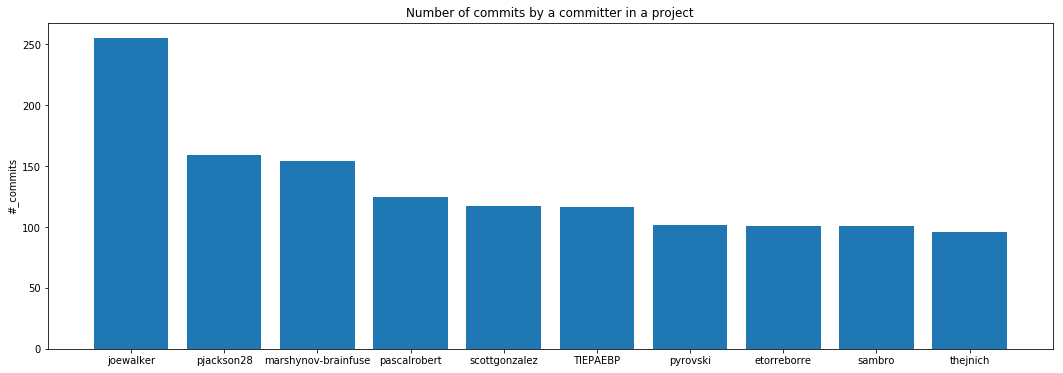

In [10]:
limit = 10 # set the number of data to show in bar graph

objects = df_sum.iloc[:limit]['login_name']
y_pos = np.arange(len(objects))
commitno = df_sum.iloc[:limit]['#_commits']
f, ax = plt.subplots(figsize=(18,6))
plt.bar(y_pos, commitno, align='center')
plt.xticks(y_pos, objects)
plt.ylabel('#_commits')
plt.title('Number of commits by a committer in a project')

plt.show()

In [ ]:
mycsv = pd.read_csv('result_after_query.csv')
name = mycsv['User_name']  # Data sample of login name. You may use data from your csv file.
data = []
j = 1

with SSHTunnelForwarder(
        (ssh_host, ssh_port),
        ssh_username=ssh_user,
        ssh_password=ssh_pwd,
        remote_bind_address=(sql_hostname, sql_port)) as tunnel:
    conn = pymysql.connect(host='127.0.0.1', user=sql_username,
            passwd=sql_password, db=sql_main_database,
            port=tunnel.local_bind_port)
                
    for n in name:
        sys.stdout.write('\rExtracting id : {} / {}'.format(j, len(name)))
        query = 'SELECT id, login FROM users WHERE login="' + n + '";'
        try:
            temp = pd.read_sql_query(query, conn)
            data.append([temp.iloc[0][0], temp.iloc[0][1]])
        except:
            pass
        j += 1
    
    conn.close()
    
pd.DataFrame(data, columns=["login_id","login_name"])